In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [5]:
loss = pd.read_csv('./BreezeAccurateHorizon075/loss.dat', delimiter=' ', header=None)

steps = loss.iloc[:, 0]

loss1 = loss[1]
loss2 = loss[2]
loss3 = loss[3]
loss4 = loss[4]
loss5 = loss[5]
loss6 = loss[6]
loss7 = loss[7]
loss8 = loss[8]
loss9 = loss[9]
loss10 = loss[10]
loss11 = loss[11]

training_losses = loss.iloc[:, 1:12]
test_losses = loss.iloc[:, 12:]

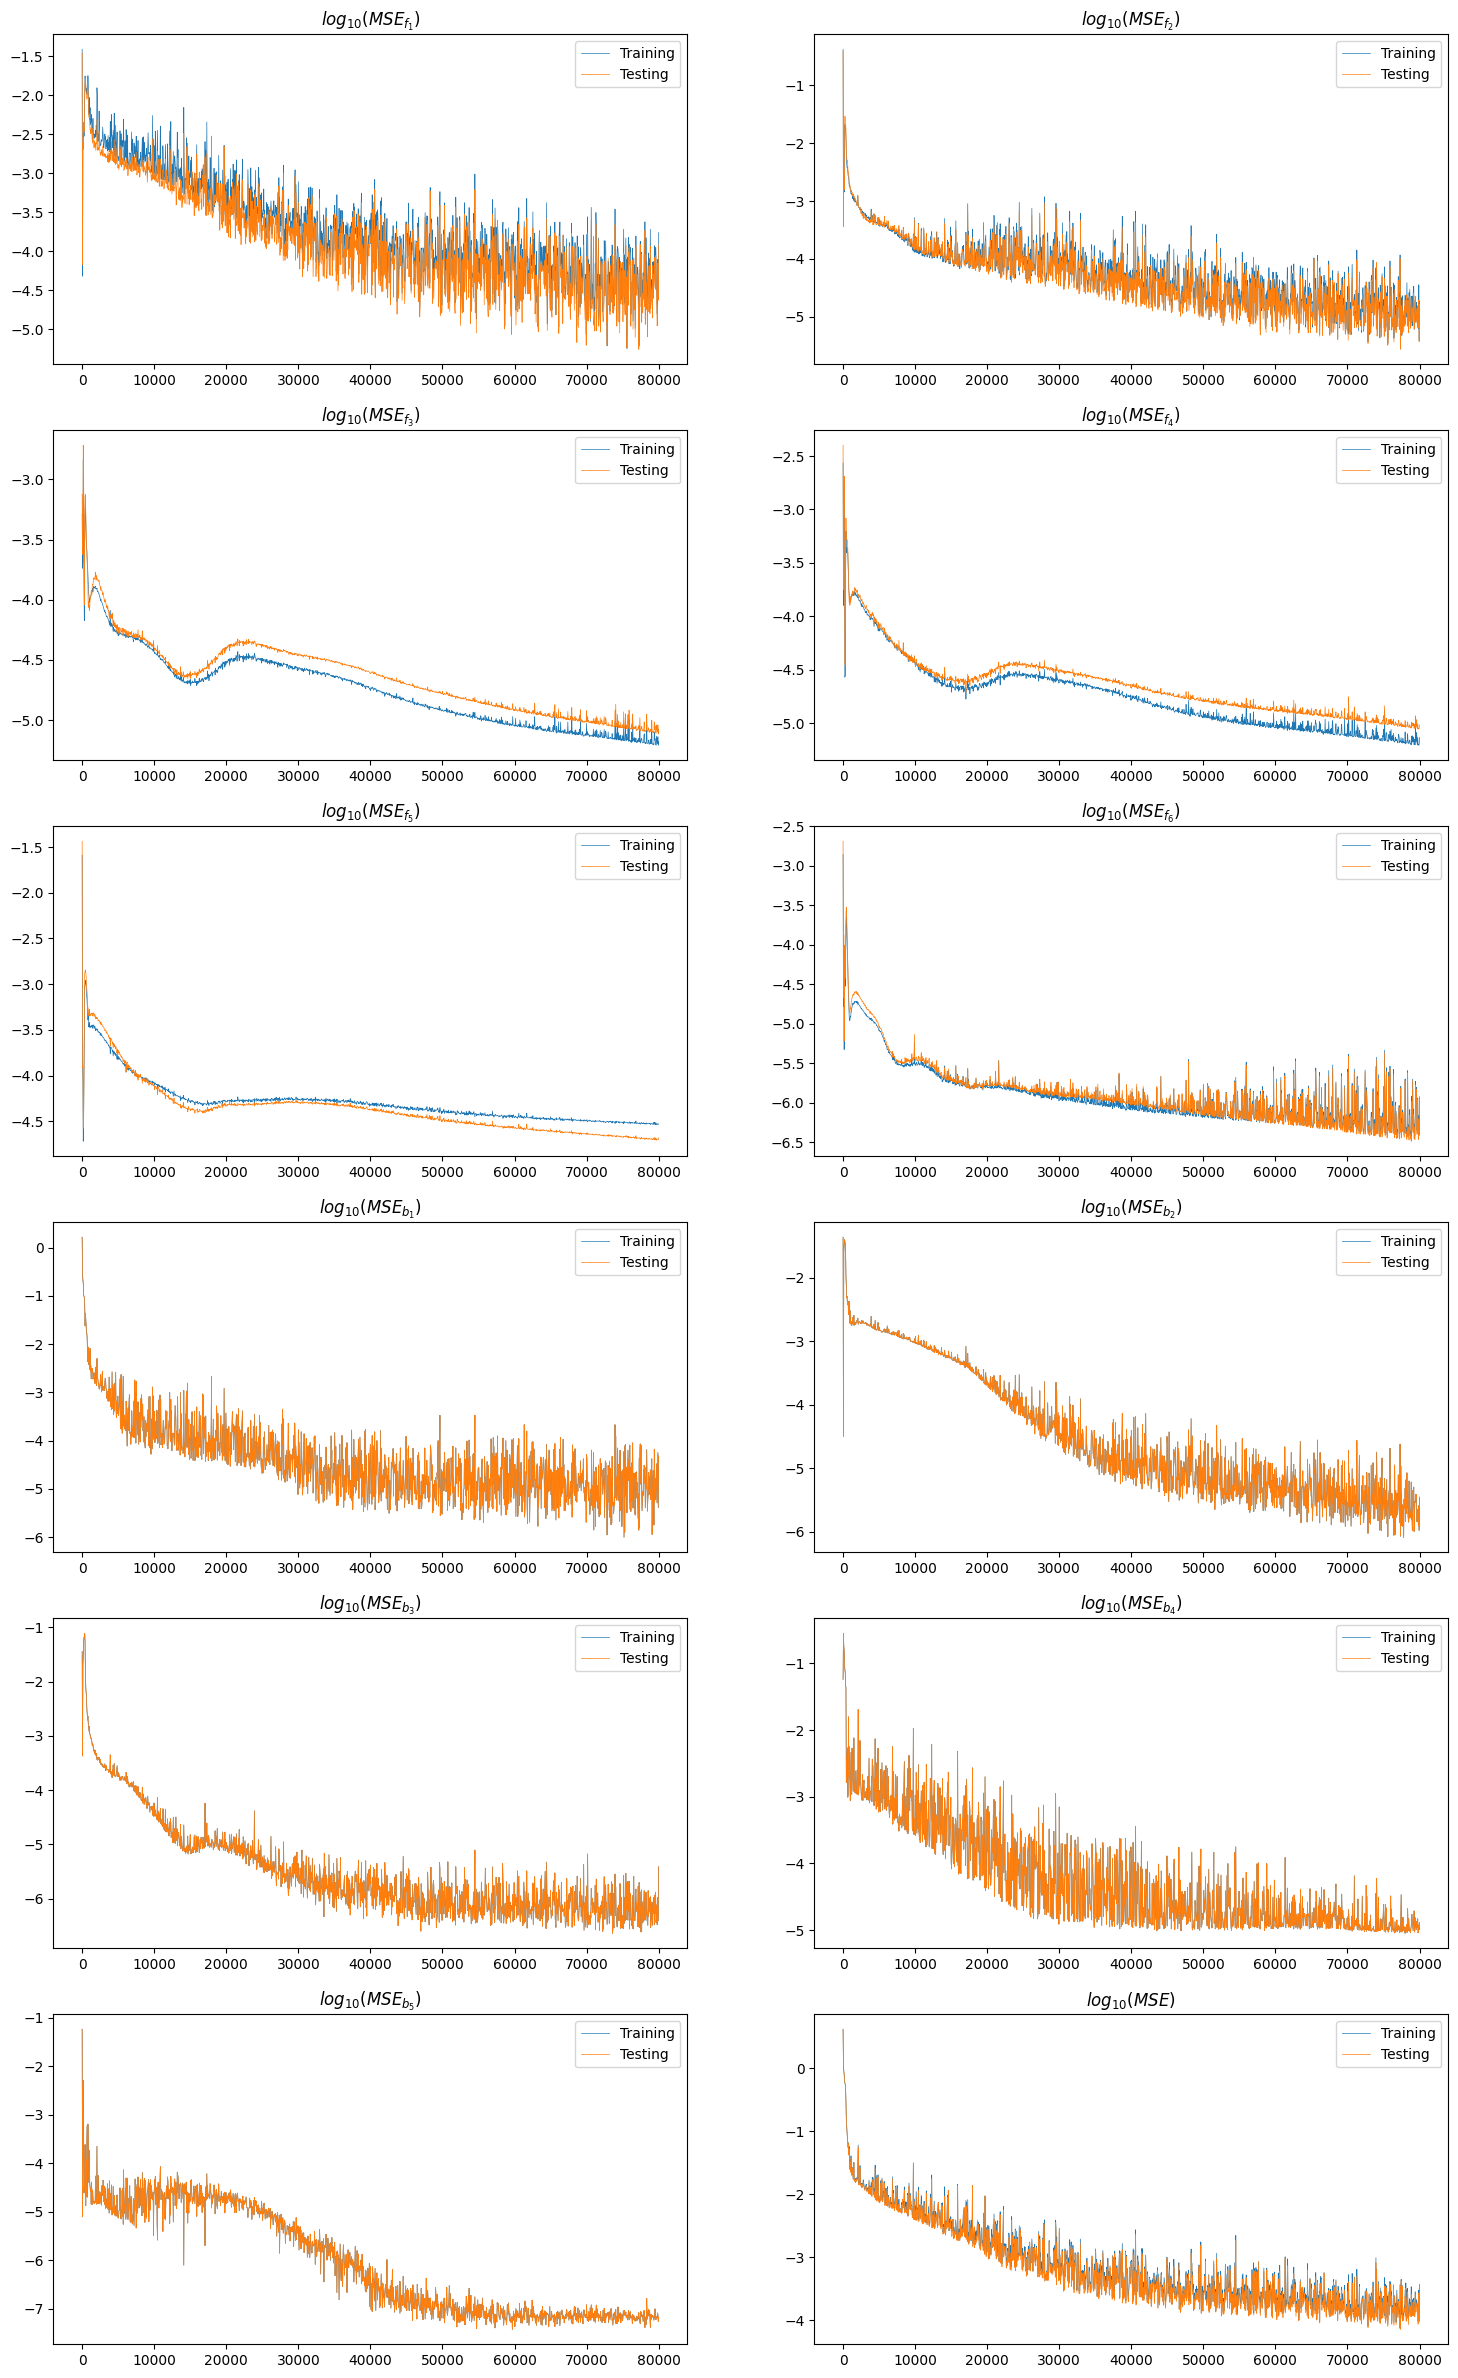

In [25]:
fig, axs = plt.subplots(6, 2, figsize=(18, 30))

linewidth = 0.5

labels = ["$log_{10}(MSE_{f_1})$", 
          "$log_{10}(MSE_{f_2})$",
          "$log_{10}(MSE_{f_3})$",
          "$log_{10}(MSE_{f_4})$",
          "$log_{10}(MSE_{f_5})$",
          "$log_{10}(MSE_{f_6})$",
          "$log_{10}(MSE_{b_1})$",
          "$log_{10}(MSE_{b_2})$",
          "$log_{10}(MSE_{b_3})$",
          "$log_{10}(MSE_{b_4})$",
          "$log_{10}(MSE_{b_5})$"]

for i in range(len(training_losses.columns.values)):
    axs_index = int(i/2), i%2
    axs[axs_index].plot(steps, np.log10(loss[training_losses.columns[i]]), linewidth=linewidth, label='Training')
    axs[axs_index].plot(steps, np.log10(loss[test_losses.columns[i]]), linewidth=linewidth, label='Testing')
    axs[axs_index].set_title(labels[i])
    axs[axs_index].legend()

loss_weights = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
axs_index = -1, -1
axs[axs_index].plot(steps, np.log10(np.dot(training_losses, loss_weights)), linewidth=linewidth, label='Training')
axs[axs_index].plot(steps, np.log10(np.dot(test_losses, loss_weights)), linewidth=linewidth, label='Testing')
axs[axs_index].set_title('$log_{10}(MSE)$')
axs[axs_index].legend()
plt.savefig('losses.png', dpi=600)
plt.show()